In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings
from collections import Counter

In [3]:
warnings.filterwarnings("ignore")

In [4]:
veri = pd.read_csv("C:\\Users\\lenovo\\Desktop\\VeriBilimiBootcamp\\btk\\weekone\\olimpiyatlar.csv")

In [6]:
veri.head(3)

,id,ad,cinsiyet,yaş,boy,kilo,takım,uoc,oyunlar,yıl,sezon,şehir,spor,olay,madalya
0,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
2,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [39]:
veri_zaman = veri.copy()

In [40]:
essiz_yillar = veri_zaman.yıl.unique()
essiz_yillar

array([1900, 1920, 2014, 1948, 1952, 1992, 1994, 2002, 2006, 2008, 1988,
       1996, 1960, 1912, 1956, 2016, 2012, 2000, 2004, 1980, 1984, 1936,
       1906, 1964, 1972, 1924, 1904, 1932, 1928, 1968, 1976, 2010, 1908,
       1998, 1896], dtype=int64)

In [41]:
sorting_array = np.sort(essiz_yillar)

In [42]:
sorting_array

array([1896, 1900, 1904, 1906, 1908, 1912, 1920, 1924, 1928, 1932, 1936,
       1948, 1952, 1956, 1960, 1964, 1968, 1972, 1976, 1980, 1984, 1988,
       1992, 1994, 1996, 1998, 2000, 2002, 2004, 2006, 2008, 2010, 2012,
       2014, 2016], dtype=int64)

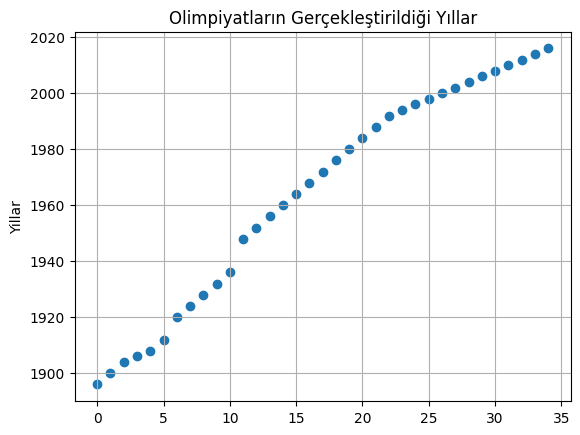

In [43]:
plt.figure()
plt.scatter(range(len(sorting_array)), sorting_array)
plt.ylabel("Yillar")
plt.title("Olimpiyatların Gerçekleştirildiği Yıllar")
plt.grid(True)
plt.show()

In [44]:
clock_time_date = pd.to_datetime(veri_zaman["yıl"], format = '%Y')
clock_time_date.head(3)

0   1900-01-01
1   1920-01-01
2   1920-01-01
Name: yıl, dtype: datetime64[ns]

In [45]:
veri_zaman["tarih_saat"] = clock_time_date
veri_zaman.head(3)

,id,ad,cinsiyet,yaş,boy,kilo,takım,uoc,oyunlar,yıl,sezon,şehir,spor,olay,madalya,tarih_saat
0,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,1900-01-01
1,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,1920-01-01
2,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,1920-01-01


In [46]:
veri_zaman = veri_zaman.set_index("tarih_saat")
veri_zaman.drop(["yıl"], axis = 1, inplace = True)
veri_zaman.head(3)

,id,ad,cinsiyet,yaş,boy,kilo,takım,uoc,oyunlar,sezon,şehir,spor,olay,madalya
tarih_saat,,,,,,,,,,,,,,
1900-01-01,4,Edgar Lindenau Aabye,M,34.0,182.48,95.62,Denmark/Sweden,DEN,1900 Summer,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,182.01,76.69,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
1920-01-01,15,Arvo Ossian Aaltonen,M,30.0,177.00,75.00,Finland,FIN,1920 Summer,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze


In [53]:
periyodik_veri = veri_zaman.loc[:, ["yaş", "boy", "kilo"]].resample("2A").mean()

In [54]:
periyodik_veri.head(3)

,yaş,boy,kilo
tarih_saat,,,
1896-12-31,23.905734,174.280350,72.734056
1898-12-31,NaN,NaN,NaN
1900-12-31,27.786689,177.882301,74.979950
